In this work I'll try using RC01 function as an inverse function for "powering" a third random hamiltonian in a grover search problem.



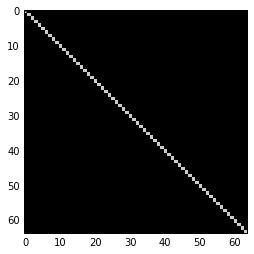

In [106]:
%matplotlib inline

from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import LH_tools as LHT

import adiabatic_sim as adsim
from importlib import reload ; reload(adsim)

n = 6
N = 2**n
eps = 0.3
tmax = LHT.find_s_one(N,eps)
tlist = np.linspace(0, tmax, 25)
id_n = tensor([qeye(2)]*n)
psi0 = tensor([basis(2,0)]*n)
psi0= hadamard_transform(n)*psi0
H_0 = id_n-psi0*psi0.trans()
LHT.plot_operator(H_0)

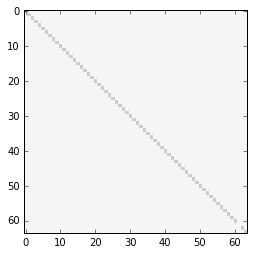

In [78]:
#look for some state
if (n < 4 ) :
    in_state = tensor([basis(2,1)]*n)
else:
    in_state = tensor(tensor([basis(2,1)]*(n-2)),basis(2,0),basis(2,1))
H_1 = id_n - in_state*in_state.trans()
LHT.plot_operator(H_1)

/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:243: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:161: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


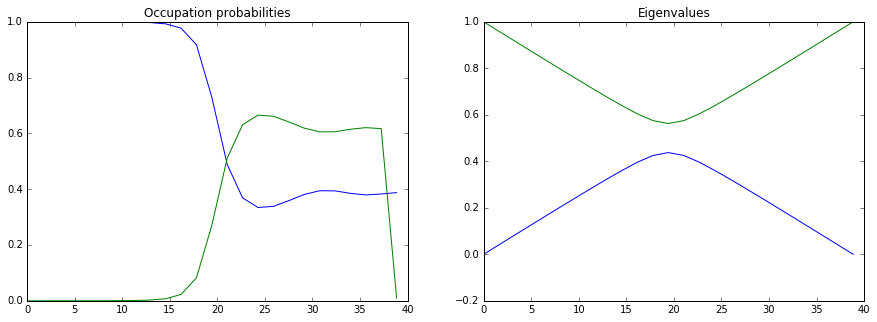

In [107]:
no_noise = Qobj(dims=H_0.dims)
s = lambda x : 1
P_mat, eigvals_mat, _ = adsim.sim_noise_evolutoion(tlist, H_0, H_1 , no_noise,  s)
LHT.plot_PandEV(P_mat,eigvals_mat,tlist)
pass

In [157]:
H_rand = rand_herm(H_0.shape[0], dims=H_0.dims)

/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:243: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:161: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


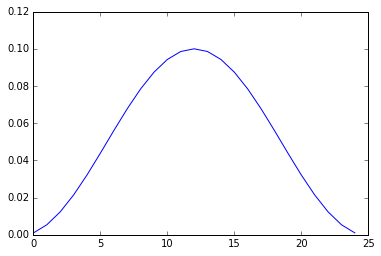

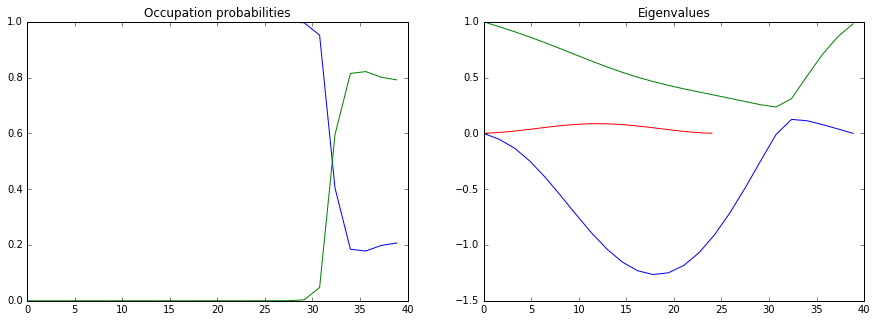

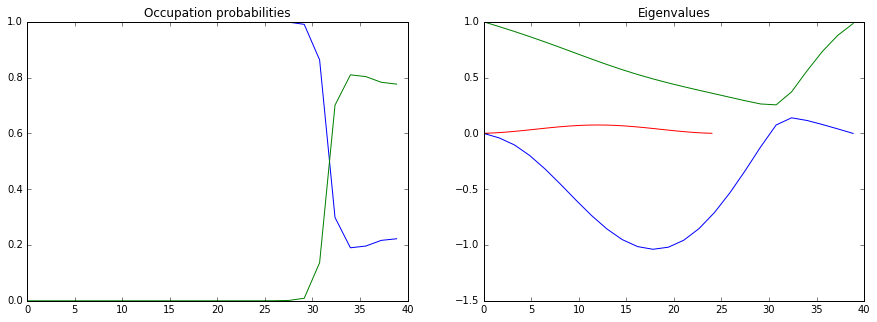

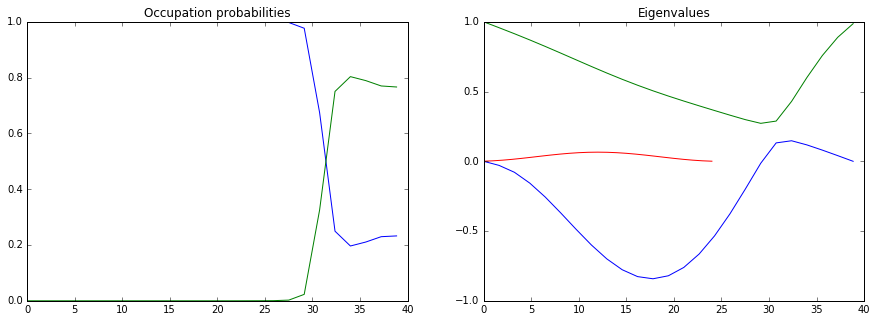

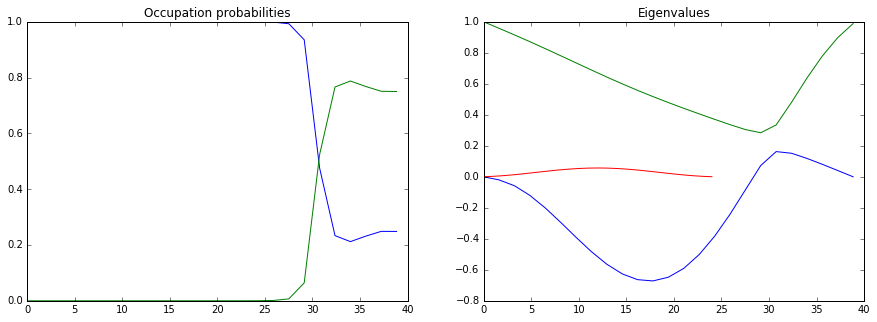

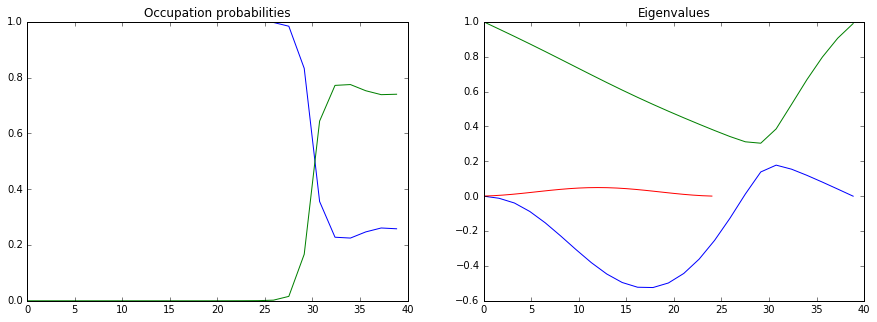

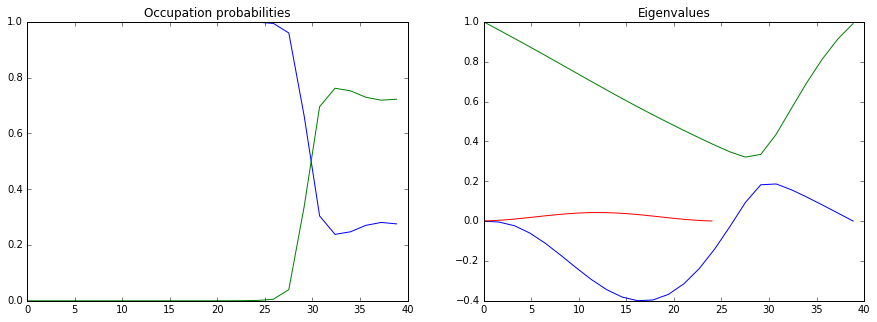

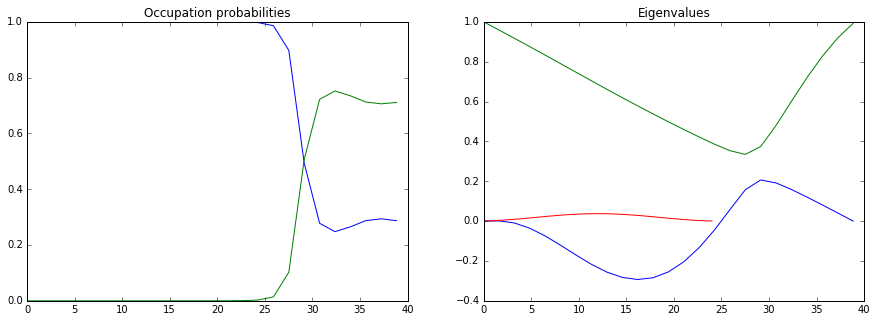

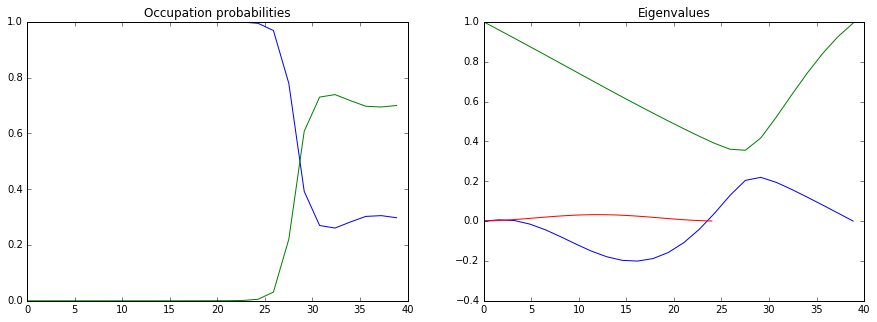

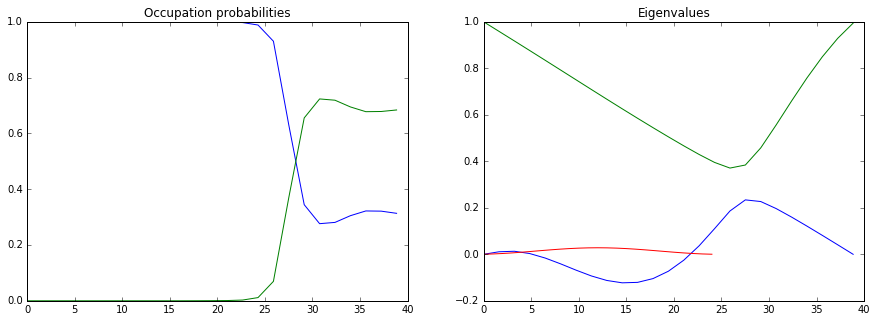

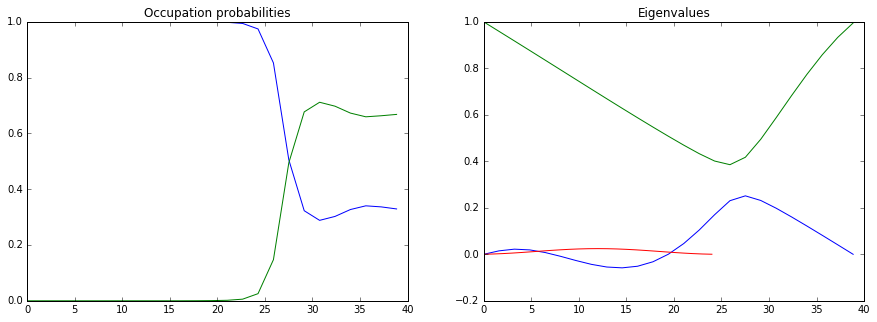

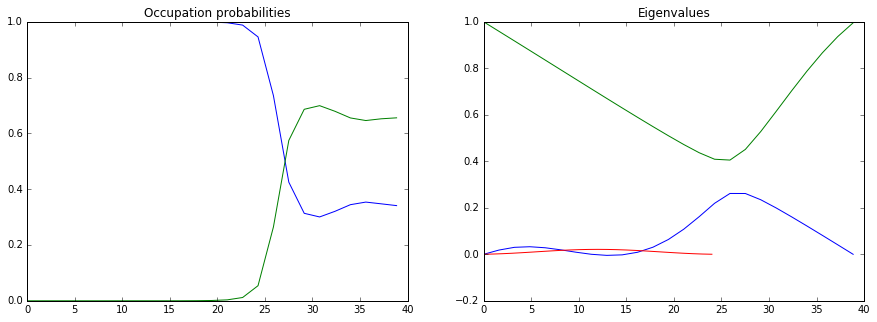

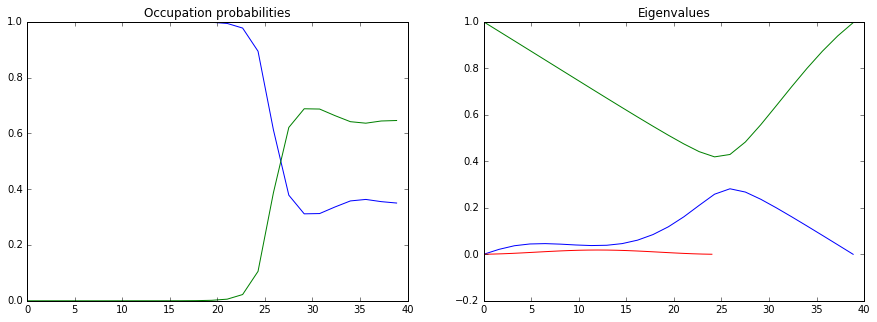

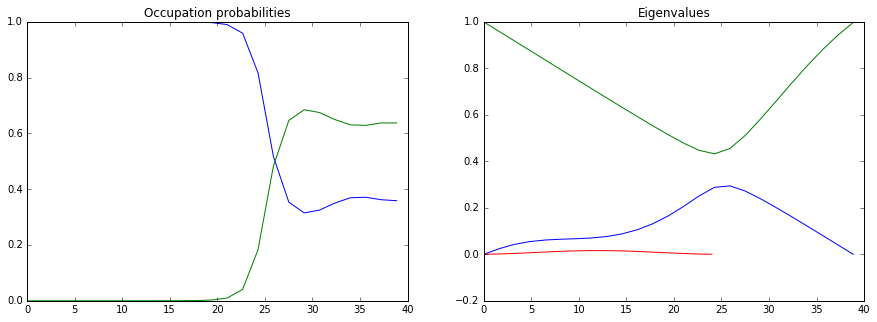

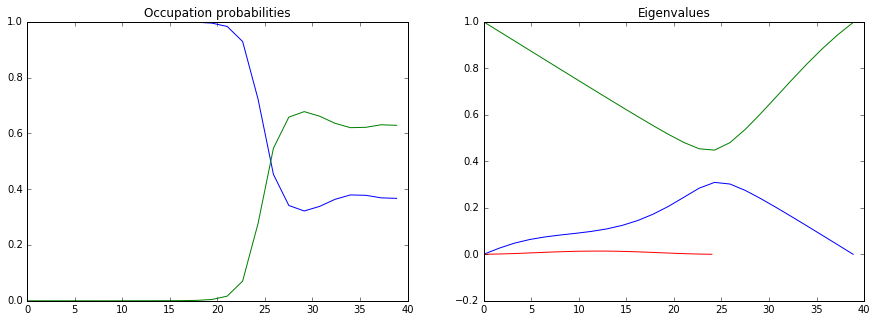

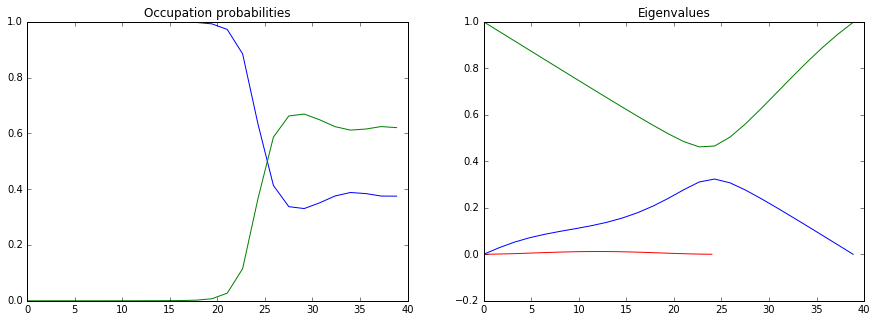

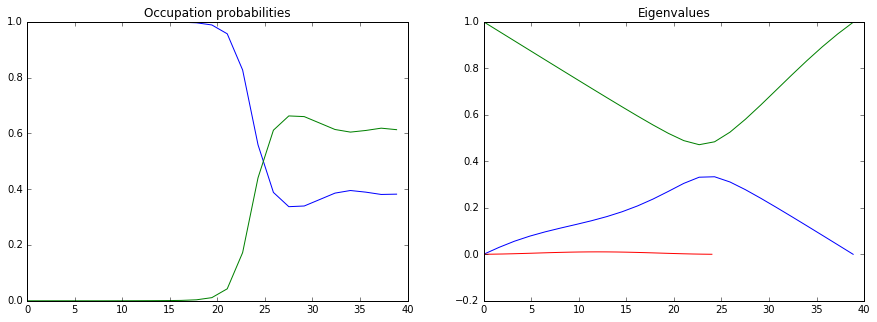

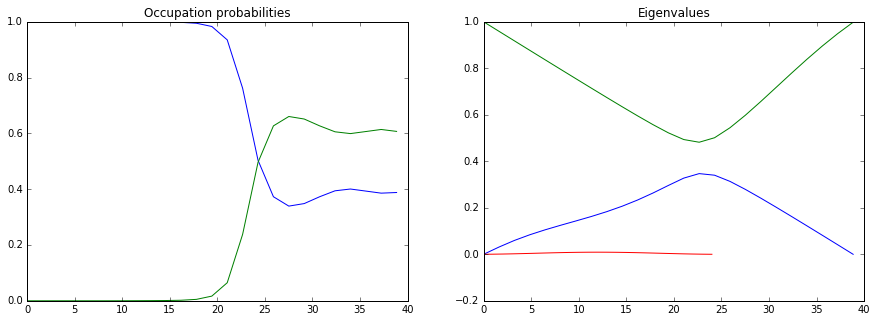

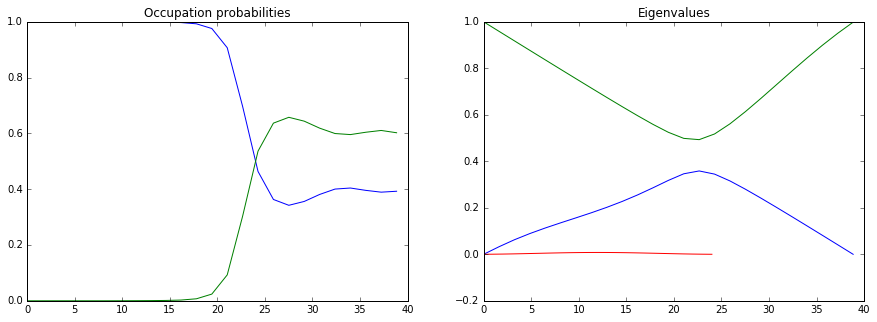

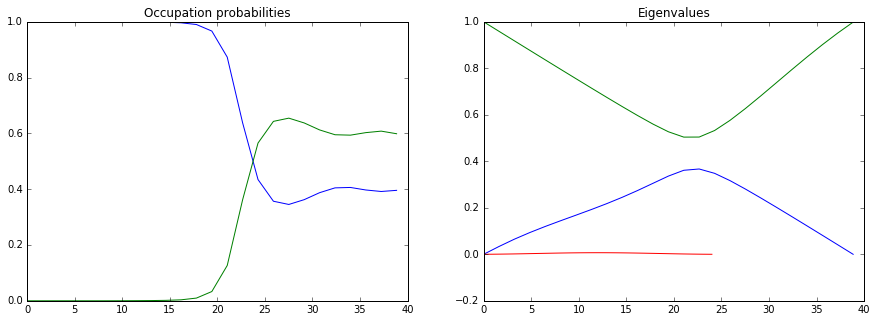

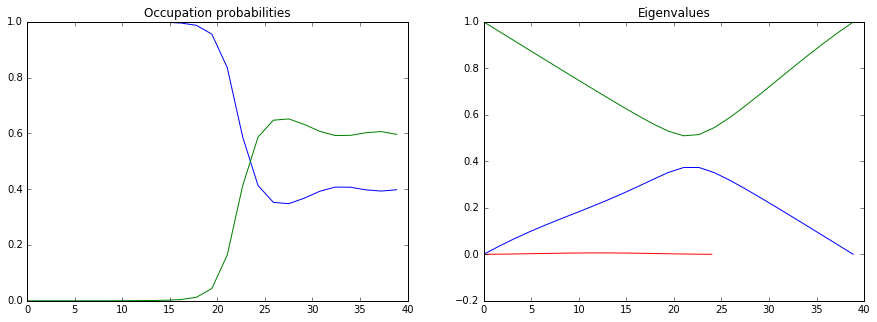

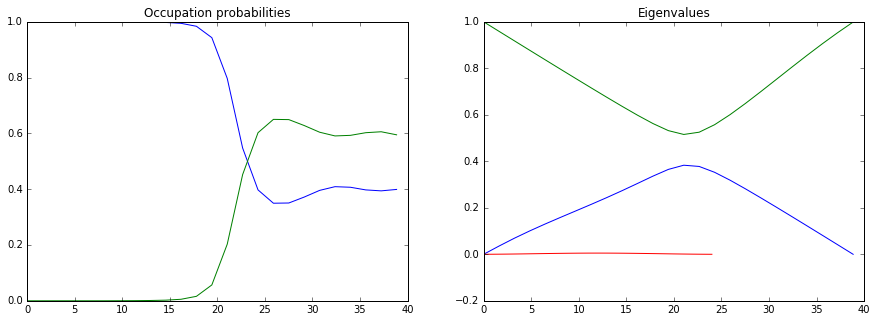

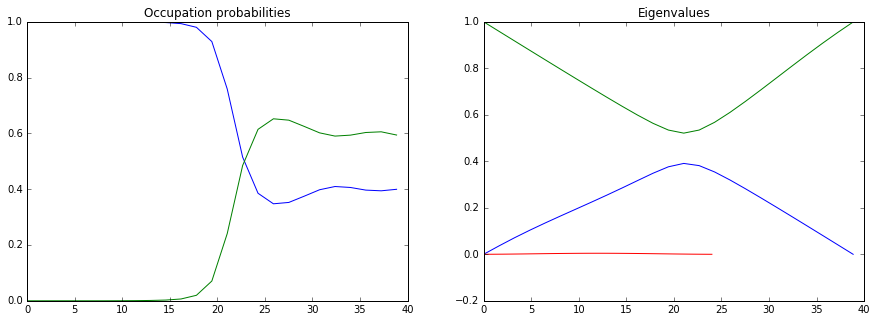

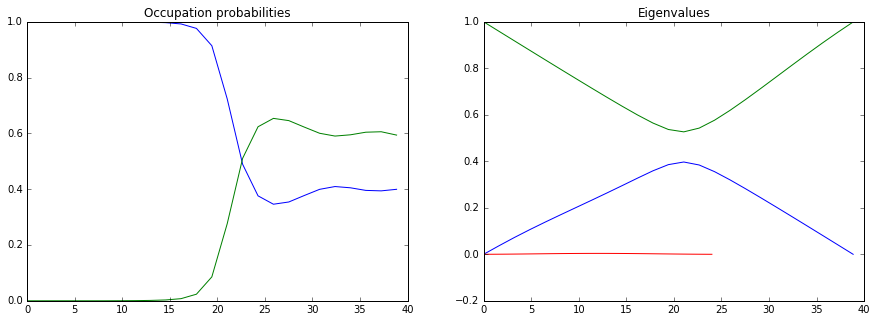

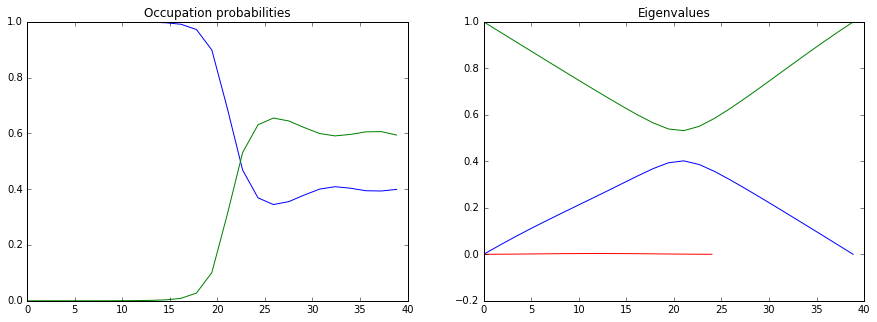

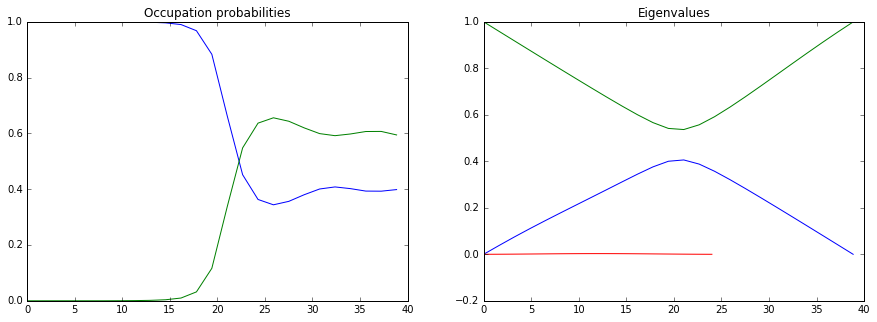

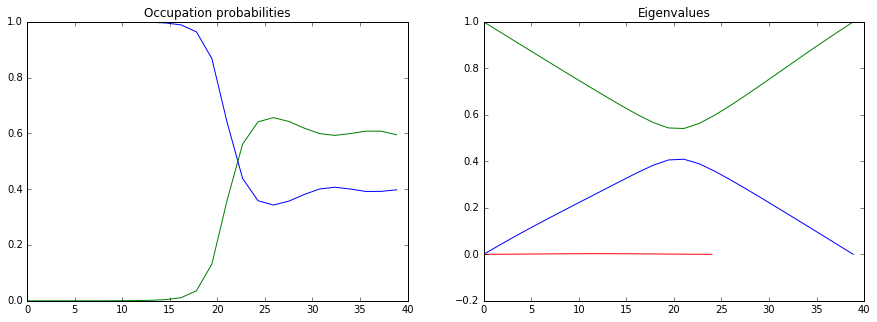

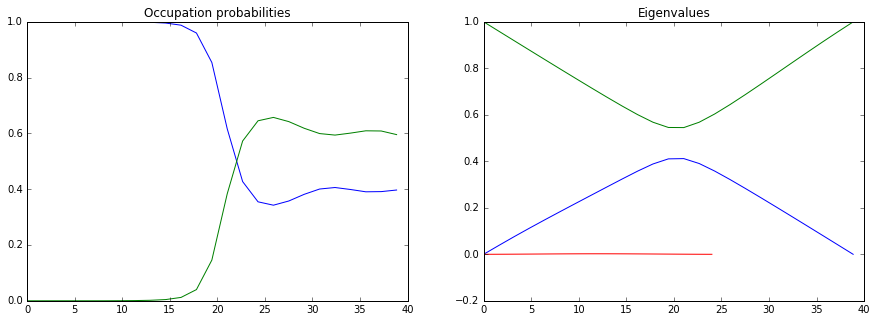

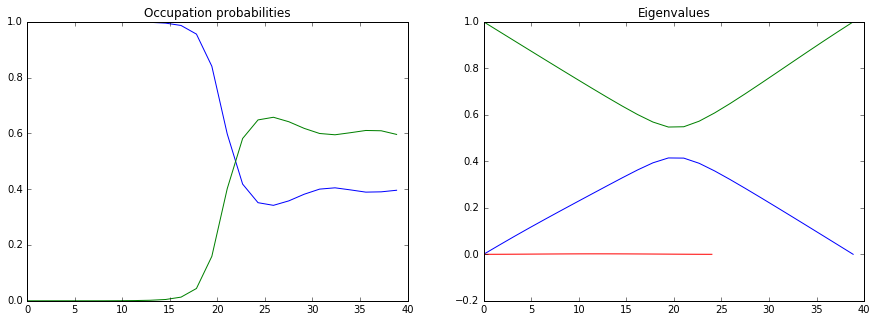

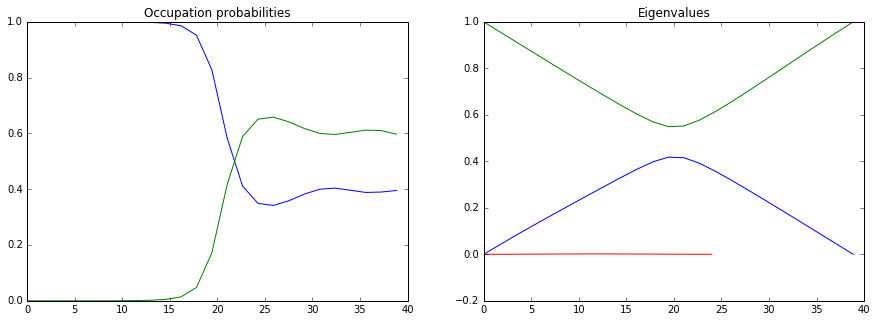

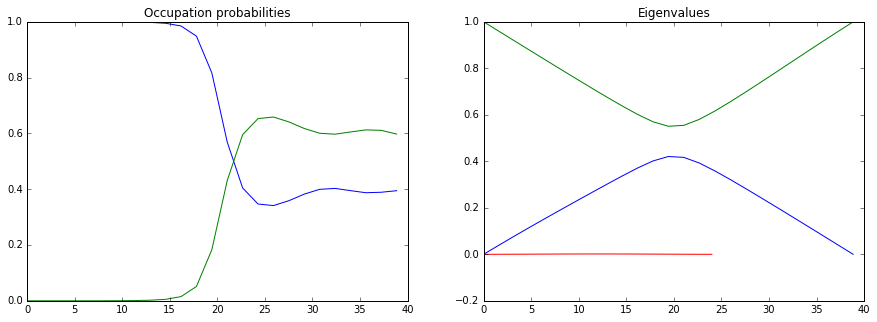

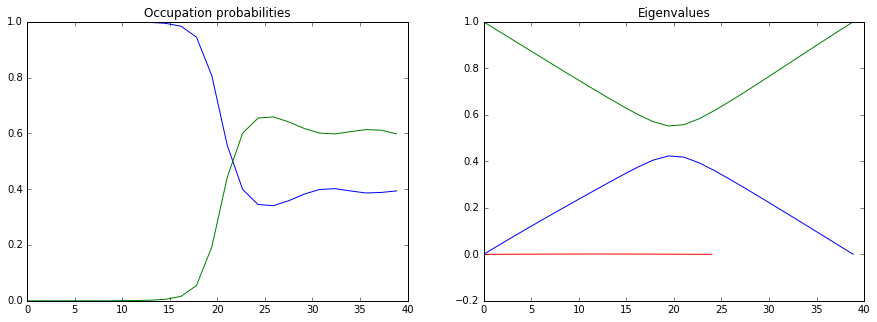

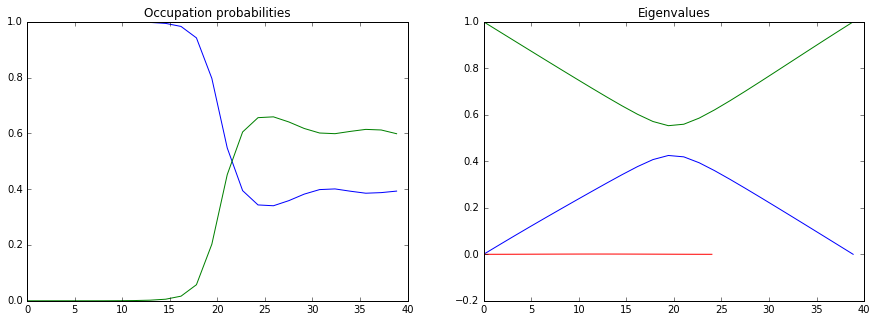

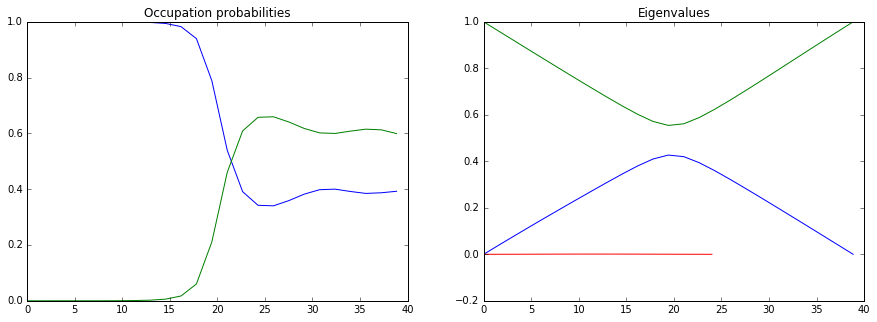

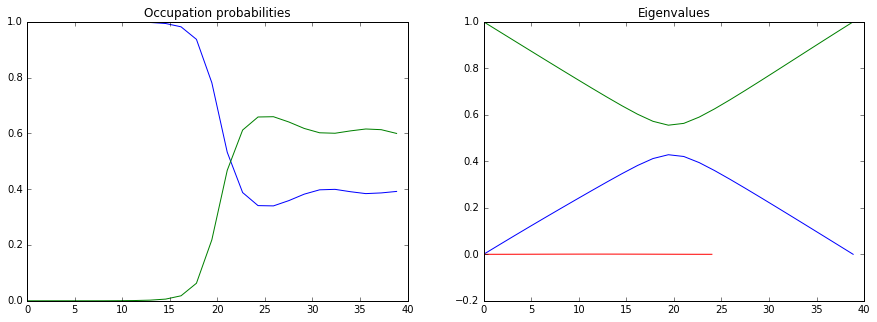

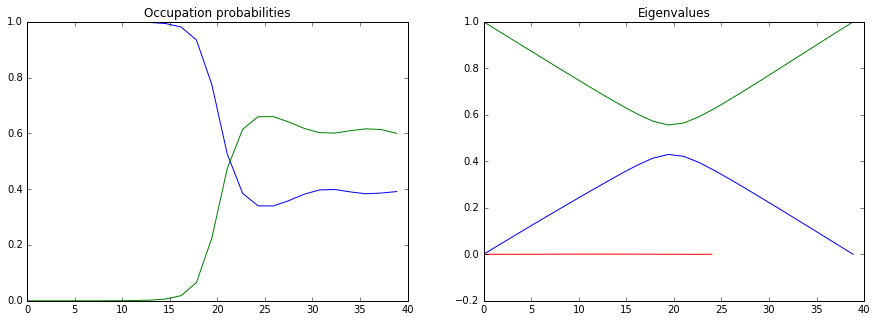

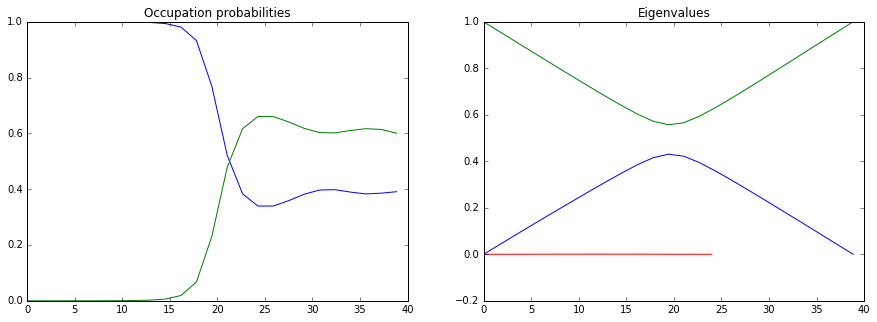

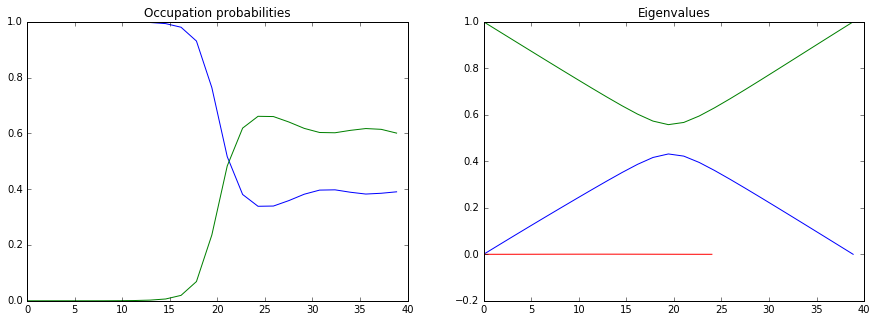

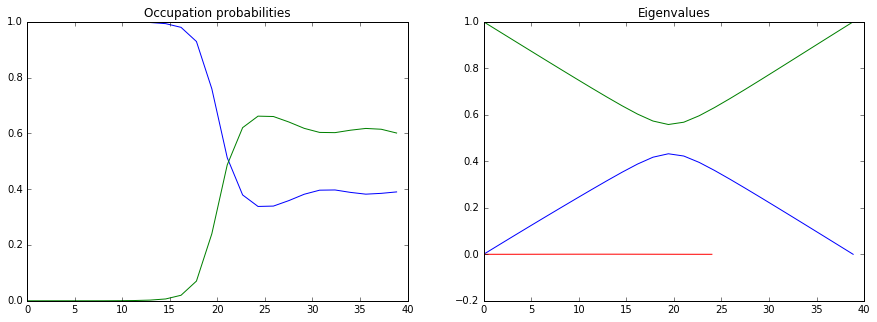

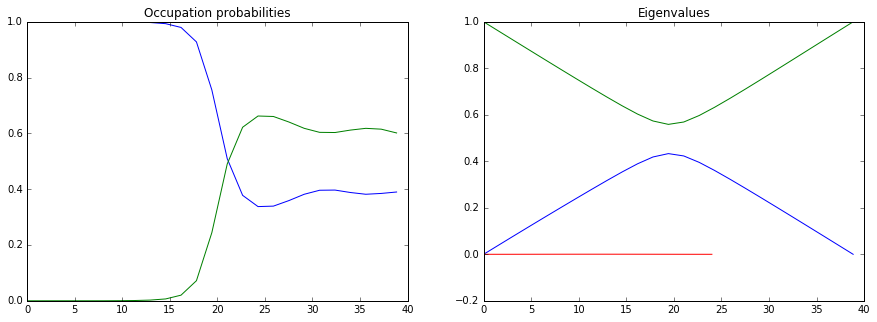

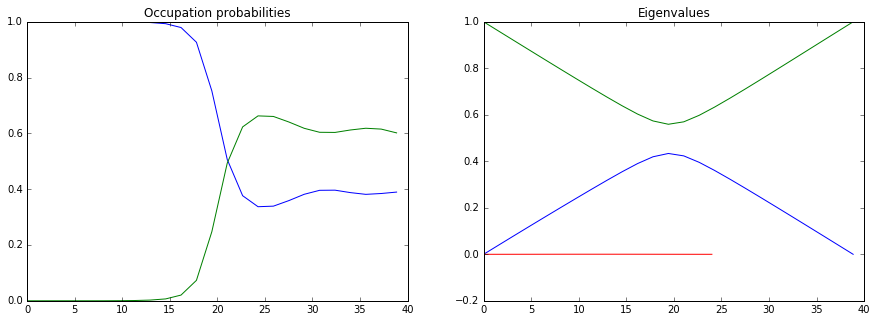

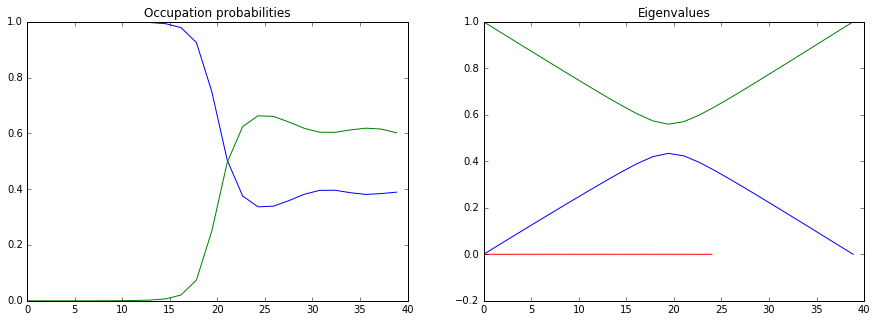

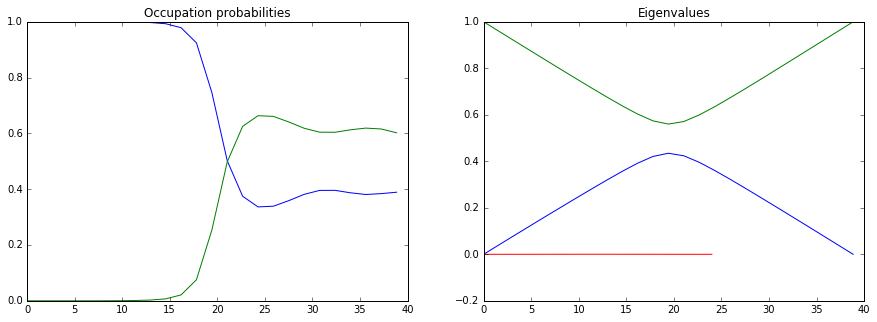

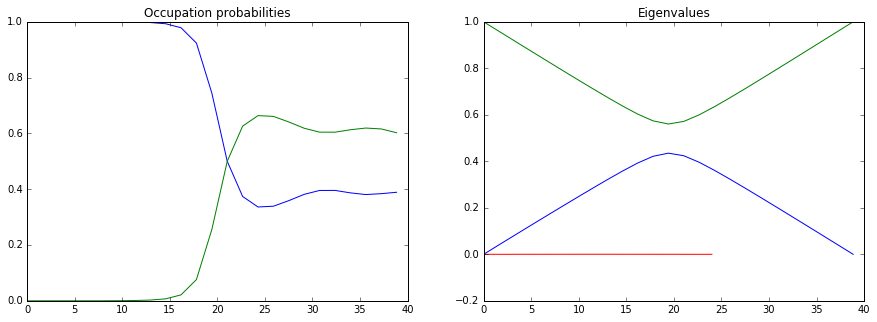

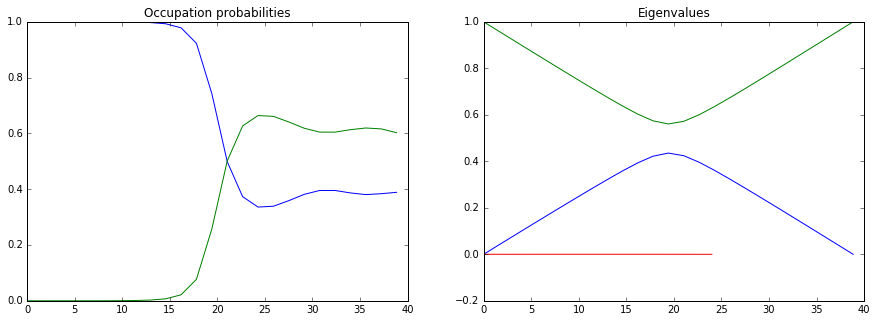

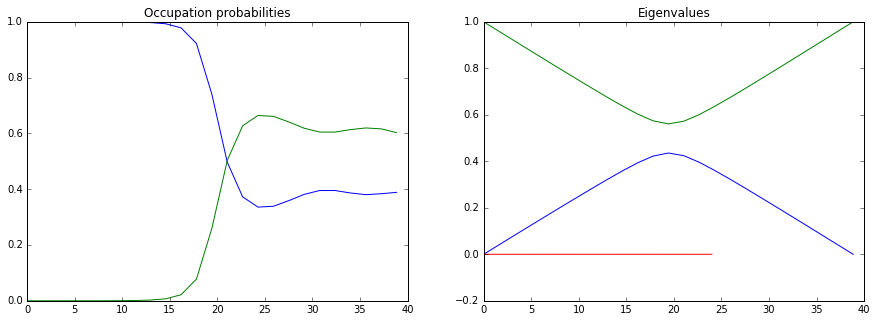

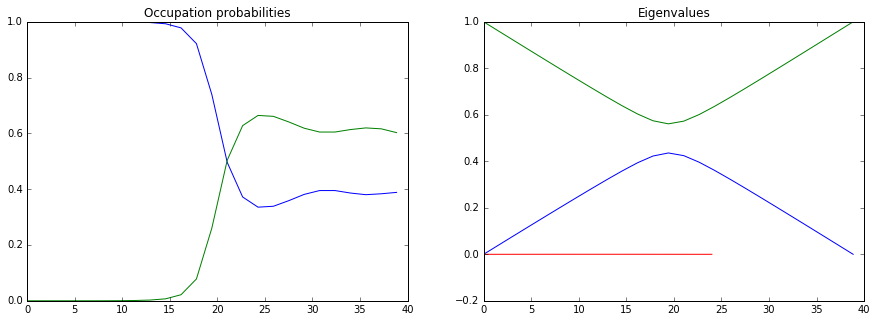

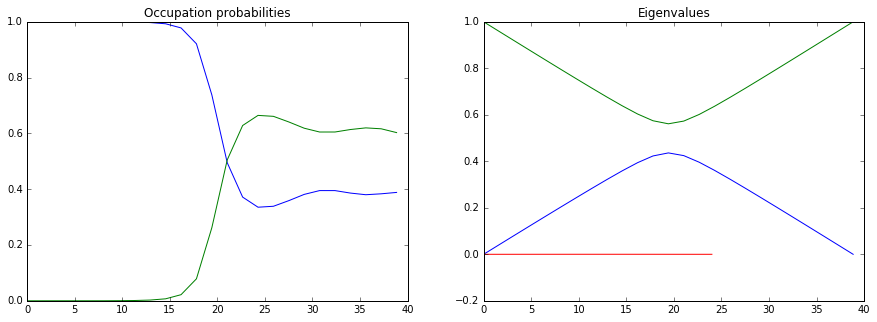

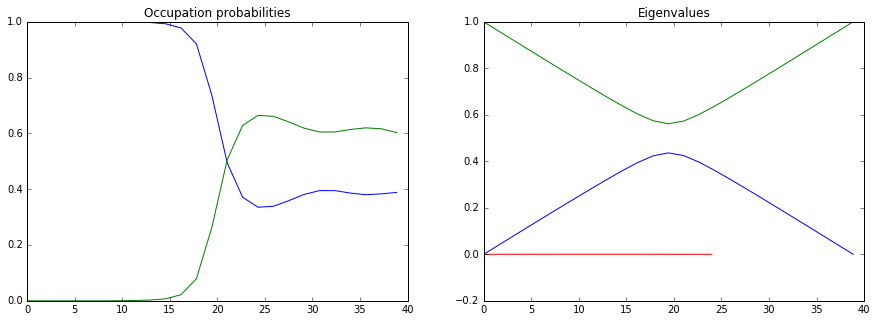

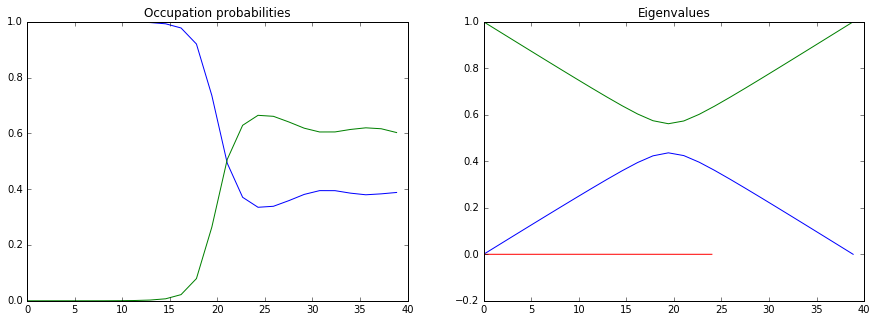

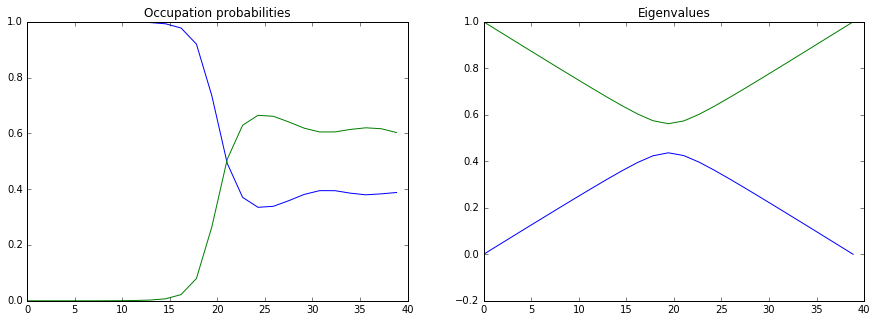

In [159]:
no_noise = Qobj(dims=H_0.dims)

for noise_power in np.logspace(1,4):
    s_func = lambda t : LHT.s_function(t, N, eps)
    s = lambda t : 1/scipy.misc.derivative(s_func, t)*min(scipy.misc.derivative(s_func,tlist)) / noise_power

    plt.plot(s(tlist))
    f = plt.figure()
    f.suptitle("Noise power %s" % noise_power)
    P_mat, eigvals_mat, _ = adsim.sim_noise_evolutoion(tlist, H_0, H_1 , H_rand,  s)
    LHT.plot_PandEV(P_mat,eigvals_mat,tlist)
pass

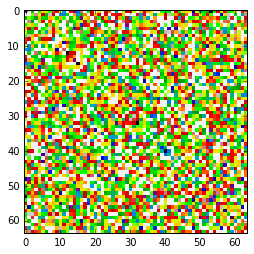

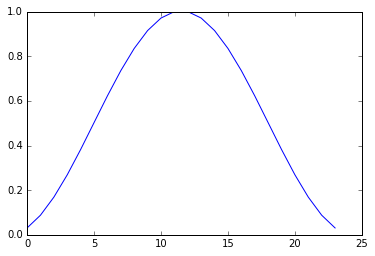

In [120]:
plt.plot(
    1/np.diff(LHT.s_function(tlist, N, eps) / min(np.diff(LHT.s_function(tlist, N, eps)))
             ))

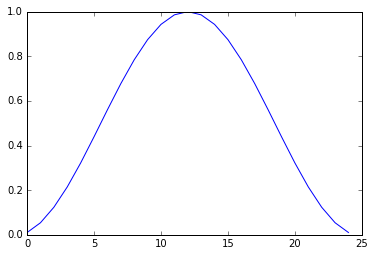

In [161]:
s_func = lambda t : LHT.s_function(t, N, eps)
s = lambda t : 1/scipy.misc.derivative(s_func, t)*min(scipy.misc.derivative(s_func,tlist)) 
plt.plot(s(tlist))

In [156]:
np.logspace(2,4)

array([   100.        ,    109.8541142 ,    120.67926406,    132.57113656,
          145.63484775,    159.98587196,    175.75106249,    193.06977289,
          212.09508879,    232.99518105,    255.95479227,    281.1768698 ,
          308.88435965,    339.32217719,    372.75937203,    409.49150624,
          449.8432669 ,    494.17133613,    542.86754393,    596.36233166,
          655.12855686,    719.685673  ,    790.60432109,    868.51137375,
          954.09547635,   1048.11313415,   1151.39539933,   1264.85521686,
         1389.49549437,   1526.41796718,   1676.83293681,   1842.06996933,
         2023.58964773,   2222.99648253,   2442.05309455,   2682.69579528,
         2947.05170255,   3237.45754282,   3556.48030622,   3906.93993705,
         4291.93426013,   4714.86636346,   5179.47467923,   5689.86602902,
         6250.55192527,   6866.48845004,   7543.12006335,   8286.42772855,
         9102.98177992,  10000.        ])

In [167]:
H_rand

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = [64, 64], type = oper, isherm = True
Qobj data =
[[ 0.00000000+0.j          0.00000000+0.j         -0.54429985-0.09405293j
  ..., -0.24153984+0.03386686j  0.00000000+0.j         -0.45034763+0.00973543j]
 [ 0.00000000+0.j          0.00000000+0.j         -0.08014888-0.18404046j
  ..., -0.28606178-0.22922908j -0.26644193+0.22502464j
  -0.32005431+0.17069001j]
 [-0.54429985+0.09405293j -0.08014888+0.18404046j  0.00000000+0.j         ...,
  -0.02640570+0.08110132j -0.02118079+0.2433384j   0.00000000+0.j        ]
 ..., 
 [-0.24153984-0.03386686j -0.28606178+0.22922908j -0.02640570-0.08110132j
  ..., -0.06788286+0.j         -0.44174123+0.35560369j  0.00000000+0.j        ]
 [ 0.00000000+0.j         -0.26644193-0.22502464j -0.02118079-0.2433384j
  ..., -0.44174123-0.35560369j  0.00000000+0.j          0.00000000+0.j        ]
 [-0.45034763-0.00973543j -0.32005431-0.17069001j  0.00000000+0.j         ...,
   0.00000000+0.j    